<a href="https://colab.research.google.com/github/mhdelta/machineLearningUtp/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1 - Modelos de regresión lineal


Sea un conjunto de entrenamiento $\bf{x} = {x_1,\dots,x_N}$

El modelo de regresión de máxima verosimilitud se encuentra cuando

$\bf{w}_{ML} = (\bf{\Phi^\top\Phi})^{-1}\bf{\Phi^\top t}$

In [0]:
import numpy as np # importar libreria de matrices, estadistica y demas
import matplotlib.pyplot as plt # libreria para graficas
np.random.seed(2000)

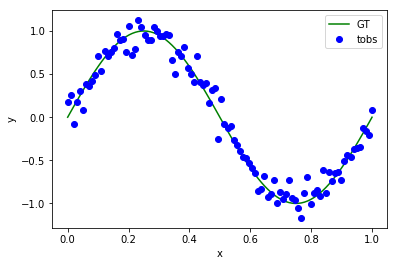

In [0]:
N = 100 #@param {type:"slider", min:1, max:100, step:1}
x = np.linspace(0,1,N)
#print(x)
t_real = np.sin(2*np.pi*x)
t_obs = t_real + 0.1*np.random.randn(N)


plt.plot(x,t_real,'-g')
plt.plot(x,t_obs ,'ob')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(('GT','tobs'))


In [0]:
# Primero creamos la matriz de diseño


def fbasePoly(xtrain,M):
  auxPhiVect = np.zeros(M)
  indM = np.linspace(0,M-1,M)
  auxPhiVect = np.power(xtrain,indM)
  return auxPhiVect

def fbaseExp(xtrain,M):
  auxPhiVect = np.ones(M)
  mu = np.linspace(0,1,M-1)
  s2 = 0.01
  for i in range(1,M):
    auxPhiVect[i] = np.exp(-0.5*(1./s2)*(xtrain-mu[i-1])**2)
  return auxPhiVect
    
    
#def desingMatrix(datos,M,fbase):
#  auxMPHI = np.zeros((N,M))
#  for n in range(0,N):
#    if fbase == 'poly':
#      auxMPHI[n,:] = fbasePoly(datos[n],M)
#    if fbase == 'exp':
#      auxMPHI[n,:] = fbaseExp(datos[n],M)
#  return auxMPHI

def desingMatrix(datos,M,fbase):
  auxMPHI = np.zeros((N,M))
  for n in range(0,N):
    auxMPHI[n,:] = fbase(datos[n],M)    
  return auxMPHI



In [0]:
M = 30
MPHI = desingMatrix(x,M,fbaseExp)
MPHIT = MPHI.T
#print(MPHI)
w_ml = np.linalg.inv(MPHIT@MPHI).dot(MPHIT@t_obs)
print('El modelo w_ml = ',w_ml)

El modelo w_ml =  [ 1.14019276e+04  1.88148233e+08 -1.09771050e+09  3.25091036e+09
 -6.48161982e+09  9.73471922e+09 -1.16839572e+10  1.16101518e+10
 -9.77003994e+09  7.06676778e+09 -4.43573571e+09  2.42973381e+09
 -1.16449551e+09  4.88998896e+08 -1.80974864e+08  6.06145703e+07
 -1.94791875e+07  5.42167991e+06  1.04293342e+06 -4.59867991e+06
  5.52010538e+06 -4.48483681e+06  3.21186625e+06 -3.13790912e+06
  4.17630512e+06 -5.05986162e+06  4.66412331e+06 -3.08893278e+06
  1.34290370e+06 -3.03220070e+05]


mse =  24971123.181586586
r^2 =  -1008933.269963094


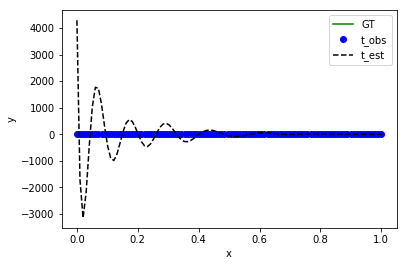

In [0]:
# Se realiza la prediccion de las etiquetas 
yEst = MPHI.dot(w_ml)

plt.plot(x,t_real,'-g')
plt.plot(x,t_obs ,'ob')
plt.plot(x,yEst ,'--k')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(('GT','t_obs','t_est'))

error_mse = 0.5*(t_real-yEst)@(t_real-yEst)
print('mse = ',error_mse)

from sklearn.metrics import r2_score

print('r^2 = ',r2_score(t_real,yEst))


# Laboratorio 2 - Modelos de regresión lineal utilizando regularización


Sea un conjunto de entrenamiento $\bf{x} = {x_1,\dots,x_N}$

El modelo de regresión de máxima verosimilitud se encuentra cuando

$\bf{w}_{ML} = (\bf{\Phi^\top\Phi + \lambda \bf{I}})^{-1}\bf{\Phi^\top t}$

El modelo w_ml =  [ 1.14019276e+04  1.88148233e+08 -1.09771050e+09  3.25091036e+09
 -6.48161982e+09  9.73471922e+09 -1.16839572e+10  1.16101518e+10
 -9.77003994e+09  7.06676778e+09 -4.43573571e+09  2.42973381e+09
 -1.16449551e+09  4.88998896e+08 -1.80974864e+08  6.06145703e+07
 -1.94791875e+07  5.42167991e+06  1.04293342e+06 -4.59867991e+06
  5.52010538e+06 -4.48483681e+06  3.21186625e+06 -3.13790912e+06
  4.17630512e+06 -5.05986162e+06  4.66412331e+06 -3.08893278e+06
  1.34290370e+06 -3.03220070e+05]
El modelo w_ml regularizado =  [ 0.01694046  0.5467067  -0.61037082]
mse =  21.548871582934765
r^2 =  0.12933852190162565


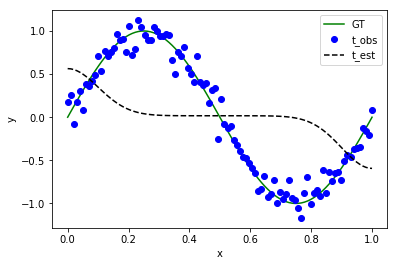

In [0]:
M = 3
lam = 0.099 # valor lambda de regularizacion
MPHI = desingMatrix(x,M,fbaseExp)
MPHIT = MPHI.T
#print(MPHI)
w_ml_reg = np.linalg.inv(MPHIT@MPHI+lam*np.eye(M)).dot(MPHIT@t_obs)
print('El modelo w_ml = ',w_ml)
print('El modelo w_ml regularizado = ',w_ml_reg)
# Se realiza la prediccion de las etiquetas 
yEst_reg = MPHI.dot(w_ml_reg)

plt.plot(x,t_real,'-g')
plt.plot(x,t_obs ,'ob')
plt.plot(x,yEst_reg ,'--k')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(('GT','t_obs','t_est'))

error_mse = 0.5*(t_real-yEst_reg)@(t_real-yEst_reg)
print('mse = ',error_mse)

from sklearn.metrics import r2_score

print('r^2 = ',r2_score(t_real,yEst_reg))

In [0]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# LAB 3: Regresión Lineal Bayesiana

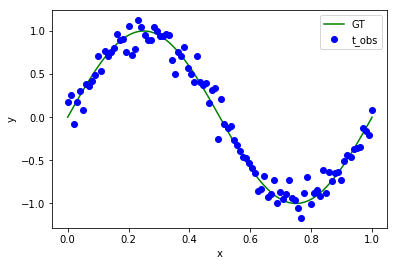

In [0]:
# Partimos del conjunto de datos X,t

plt.plot(x,t_real,'-g')
plt.plot(x,t_obs ,'ob')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(('GT','t_obs'))

[ 0.00150184  0.00720564  0.01170353  0.01730831  0.02387981  0.03116164
  0.0388063   0.04641544  0.05358667  0.05995694  0.06523482  0.06921757
  0.07179333  0.07293182  0.07266788  0.07108204  0.06828066  0.06437772
  0.05947973  0.05367554  0.04703298  0.03960343  0.03143398  0.02258458
  0.01314614  0.00325461 -0.00690314 -0.0170938  -0.02705217 -0.03650289
 -0.04518475 -0.05287242 -0.05939137 -0.06462345 -0.06850346 -0.07100905
 -0.07214812 -0.07194802 -0.07045002 -0.06771086 -0.06381046 -0.05886352
 -0.05303064 -0.04652474 -0.03960866 -0.03258186 -0.02575675 -0.0194278
 -0.0138395  -0.00915972]
mse =  2.013651639691843


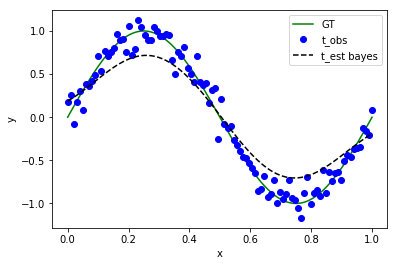

In [0]:
# Iniciamos los valores para alpha y beta
M = 50
MPHI = desingMatrix(x,M,fbaseExp)
MPHIT = MPHI.T
alpha = 100*np.random.randn(1)
invBeta = 1 *np.random.randn(1)
beta = 1/invBeta

# Con alpha y beta puedo estimar los parámetros del posterior para w

invSn = alpha*np.eye(M) + beta*MPHIT@MPHI
#print(invSn)
Sn = np.linalg.inv(invSn) # covarianza del post
mn = beta*(Sn.dot(MPHIT@t_obs)) # media del post
print(mn) # Estimacion de un modelo

yEst_bayes = MPHI.dot(mn)

plt.plot(x,t_real,'-g')
plt.plot(x,t_obs ,'ob')
plt.plot(x,yEst_bayes ,'--k')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(('GT','t_obs','t_est bayes'))

error_mse = 0.5*(t_real-yEst_bayes)@(t_real-yEst_bayes)
print('mse = ',error_mse)


In [0]:
def logEvi(N,gamma,invSn,mn,MPHI,etiquetas,alpha,beta):
  levi = 0.5*N*np.log(alpha)+0.5*N*np.log(beta)
  E_mn = 0.5*beta*(etiquetas-MPHI.dot(mn)).dot(etiquetas-MPHI.dot(mn))+0.5*alpha*(mn.dot(mn))
  levi = levi - E_mn -0.5*np.log(np.linalg.det(invSn)) - 0.5*N*np.log(2*np.pi)
  return levi

[ 3.69658049e+02+0.00000000e+00j  1.54519174e+02+0.00000000e+00j
  4.57650762e+01+0.00000000e+00j  2.19538222e+02+0.00000000e+00j
  8.77460498e+01+0.00000000e+00j  7.75753144e+00+0.00000000e+00j
  1.93800036e+01+0.00000000e+00j  8.06122535e-01+0.00000000e+00j
  2.43044717e+00+0.00000000e+00j  6.07208385e-02+0.00000000e+00j
  1.79276396e-01+0.00000000e+00j  3.94943323e-03+0.00000000e+00j
  8.07814742e-03+0.00000000e+00j  1.67840430e-04+0.00000000e+00j
  2.30280473e-04+0.00000000e+00j  3.70018736e-06+0.00000000e+00j
  4.27707565e-06+0.00000000e+00j  4.87232506e-08+0.00000000e+00j
  5.30028378e-08+0.00000000e+00j  4.25770337e-10+0.00000000e+00j
  4.46568939e-10+0.00000000e+00j  2.60197036e-12+0.00000000e+00j
  2.56548894e-12+0.00000000e+00j -3.00746723e-14+0.00000000e+00j
 -2.74012510e-14+0.00000000e+00j -2.59793966e-14+0.00000000e+00j
  3.28207757e-14+0.00000000e+00j -1.64858437e-14+0.00000000e+00j
 -1.52721690e-14+0.00000000e+00j -1.23370310e-14+0.00000000e+00j
 -1.04383605e-14+0.000000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


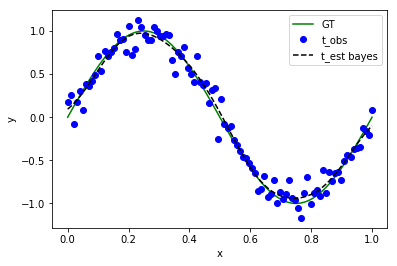

In [0]:
# Realizar la solución iterativa para alpha y beta
max_iters = 50
errorBayes = np.zeros(max_iters)
log_evi = np.zeros(max_iters)
rho = np.linalg.eigvals(MPHIT@MPHI)
print(rho)
for it in range(0,max_iters):
  lambda_i = beta*rho # todo el vector lambda
  gamma = np.sum(lambda_i/(lambda_i+alpha))
  alpha = gamma/(mn.dot(mn))
  invBeta = (1./(N-gamma))*(t_obs-MPHI.dot(mn)).dot(t_obs-MPHI.dot(mn))
  beta = 1/invBeta
  # Con alpha y beta puedo estimar los parámetros del posterior para w

  invSn = alpha*np.eye(M) + beta*MPHIT@MPHI
  #print(invSn)
  Sn = np.linalg.inv(invSn) # covarianza del post
  mn = beta*(Sn.dot(MPHIT@t_obs)) # media del post
  errorBayes[it] = 0.5*(t_obs-MPHI.dot(mn)).dot(t_obs-MPHI.dot(mn))
  log_evi[it] = logEvi(N,gamma,invSn,mn,MPHI,t_obs,alpha,beta)

yEst_bayes = MPHI.dot(mn)

plt.plot(x,t_real,'-g')
plt.plot(x,t_obs ,'ob')
plt.plot(x,yEst_bayes ,'--k')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(('GT','t_obs','t_est bayes'))

error_mse = 0.5*(t_real-yEst_bayes)@(t_real-yEst_bayes)
print('mse = ',error_mse)


Text(0, 0.5, 'MSE')

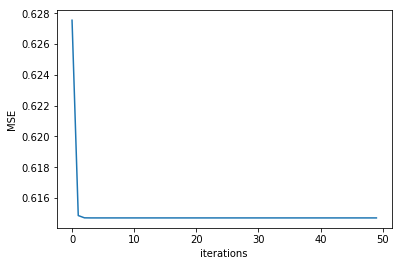

In [0]:
plt.plot(errorBayes)
plt.xlabel('iterations')
plt.ylabel('MSE')

Text(0, 0.5, 'Log evidencia')

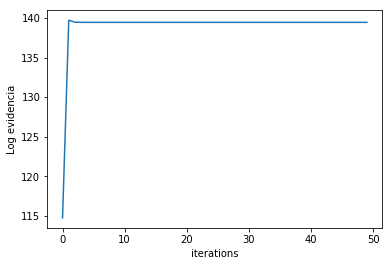

In [0]:
plt.plot(log_evi)
plt.xlabel('iterations')
plt.ylabel('Log evidencia')